In [4]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
pd.options.display.max_columns = None

In [5]:
df = pd.read_csv('taskdata.csv')

In [6]:
df.head()

,user_id,account_id,max_return_days,average_return_days,customer_since_months,total_revenue,average_revenue,avg_vas_count,avg_used_vas_value,business_type,avg_wallet_bonus,avg_active_ads,avg_new_ads,avg_email_replies,avg_call_replies,avg_sms_replies,target
0,410039,496.0,8,1.500000,14,0.0,0.0,3.666667,66.666667,0,300.0,79.333333,15.250000,32.416667,27.916667,0.250000,0
1,410240,499.0,37,8.200000,10,0.0,0.0,4.900000,114.000000,0,0.0,232.100000,18.300000,16.200000,13.800000,0.000000,0
2,411764,493.0,9,1.533333,15,0.0,0.0,5.333333,106.666667,0,150.0,55.083333,3.750000,20.250000,24.500000,0.000000,0
3,411985,262.0,1,1.000000,14,0.0,0.0,6.307692,176.153846,0,1481.0,409.538462,80.769231,87.461538,57.615385,0.000000,1
4,412071,496.0,1,1.000000,18,0.0,0.0,5.846154,109.230769,0,41.5,48.230769,1.692308,17.461538,25.769231,0.230769,0


In [7]:
df.describe()

,user_id,account_id,max_return_days,average_return_days,customer_since_months,total_revenue,average_revenue,avg_vas_count,avg_used_vas_value,business_type,avg_wallet_bonus,avg_active_ads,avg_new_ads,avg_email_replies,avg_call_replies,avg_sms_replies,target
count,4.407000e+03,4400.000000,4407.000000,4407.000000,4407.000000,4407.000000,4407.000000,4407.000000,4407.000000,4407.000000,4407.000000,4407.000000,4407.000000,4407.000000,4407.000000,4407.000000,4407.000000
mean,4.106655e+09,506.553864,22.335602,7.171576,9.874064,194.130365,16.942615,3.249388,72.119006,0.497844,338.851046,98.922260,16.812003,25.681004,27.622151,0.162009,0.103245
std,6.794948e+09,326.072756,43.591246,19.209092,5.169639,1548.361547,128.268824,5.509869,117.019515,1.199725,831.746150,297.692950,68.045904,55.324218,61.069006,0.517693,0.304313
min,4.100390e+05,111.000000,1.000000,0.500000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,6.184510e+08,226.000000,1.000000,1.000000,5.000000,0.000000,0.000000,0.142857,2.727273,0.000000,0.000000,13.500000,2.500000,4.461538,4.384615,0.000000,0.000000
50%,7.296626e+08,493.000000,2.000000,1.076923,12.000000,0.000000,0.000000,2.000000,45.000000,0.000000,40.000000,40.000000,6.333333,12.266667,12.933333,0.000000,0.000000
75%,7.292936e+09,1005.000000,30.000000,5.666667,14.000000,0.000000,0.000000,4.333333,100.000000,0.000000,327.280000,101.291667,14.250000,28.000000,30.784615,0.153846,0.000000
max,7.356031e+10,1017.000000,354.000000,354.000000,24.000000,43957.172700,3852.727273,156.583333,3357.500000,5.000000,15606.500000,9183.866667,2606.000000,1716.400000,1743.266667,14.636364,1.000000


In [8]:
df.columns

Index(['user_id', 'account_id', 'max_return_days', 'average_return_days',
       'customer_since_months', 'total_revenue', 'average_revenue',
       'avg_vas_count', 'avg_used_vas_value', 'business_type',
       'avg_wallet_bonus', 'avg_active_ads', 'avg_new_ads',
       'avg_email_replies', 'avg_call_replies', 'avg_sms_replies', 'target'],
      dtype='object')

In [9]:
df.shape

(4407, 17)

In [10]:
df.isnull().sum()

user_id                  0
account_id               7
max_return_days          0
average_return_days      0
customer_since_months    0
total_revenue            0
average_revenue          0
avg_vas_count            0
avg_used_vas_value       0
business_type            0
avg_wallet_bonus         0
avg_active_ads           0
avg_new_ads              0
avg_email_replies        0
avg_call_replies         0
avg_sms_replies          0
target                   0
dtype: int64

In [11]:
# Get unique count for each variable
df.nunique()

user_id                  4407
account_id                 15
max_return_days           229
average_return_days       917
customer_since_months      23
total_revenue             434
average_revenue           510
avg_vas_count             677
avg_used_vas_value       1027
business_type               6
avg_wallet_bonus          989
avg_active_ads           2757
avg_new_ads              1422
avg_email_replies        1900
avg_call_replies         1932
avg_sms_replies           140
target                      2
dtype: int64

In [12]:
# Drop irrelevant columns
df = df.drop(["user_id", "account_id"], axis = 1)

In [13]:
# Check variable data types
df.dtypes

max_return_days            int64
average_return_days      float64
customer_since_months      int64
total_revenue            float64
average_revenue          float64
avg_vas_count            float64
avg_used_vas_value       float64
business_type              int64
avg_wallet_bonus         float64
avg_active_ads           float64
avg_new_ads              float64
avg_email_replies        float64
avg_call_replies         float64
avg_sms_replies          float64
target                     int64
dtype: object

#### Here my main interest is to get an understanding as to how the given attributes relate too the 'target' status.

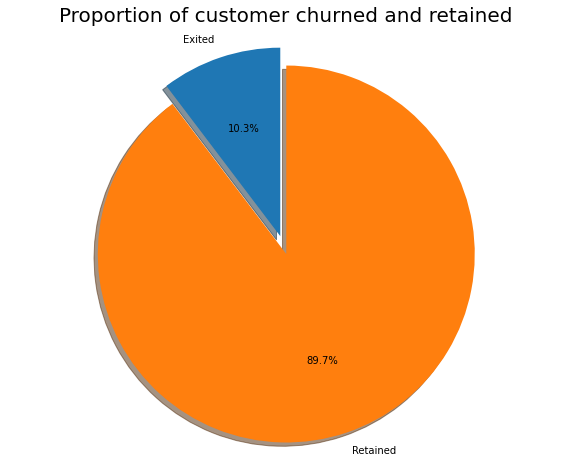

In [14]:
labels = 'Exited', 'Retained'
sizes = [df.target[df['target']==1].count(), df.target[df['target']==0].count()]
explode = (0, 0.1)
fig1, ax1 = plt.subplots(figsize=(10, 8))
ax1.pie(sizes, explode=explode, labels=labels, autopct='%1.1f%%',
        shadow=True, startangle=90)
ax1.axis('equal')
plt.title("Proportion of customer churned and retained", size = 20)
plt.show()

##### So about 10% of the customers have churned. The baseline model could be to predict that 10% of the customers will churn. Given 10% is a small number, I need to ensure that the chosen model does predict with great accuracy.

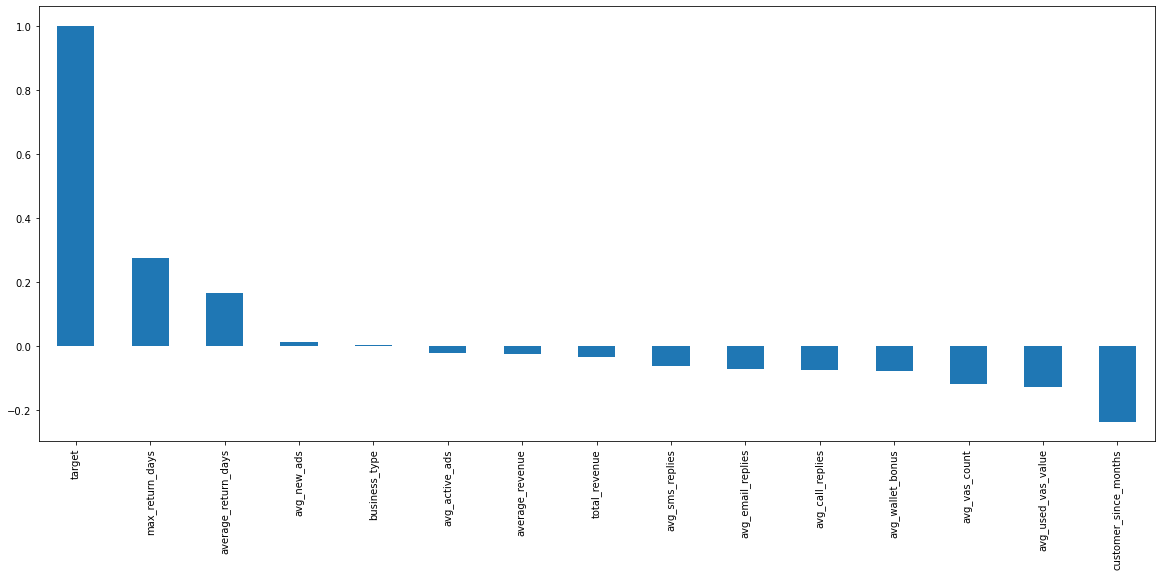

In [15]:
# Get Correlation of "target" with other variables
plt.figure(figsize=(20,8))
df.corr()['target'].sort_values(ascending = False).plot(kind='bar');

* max_return_days and average_return_days seem to be positively correlated with target.
* While, customer_since_months and avg_used_vas_value seem to be negatively correlated with churn.
* I will explore the patterns for the above correlations below before diving into modelling.

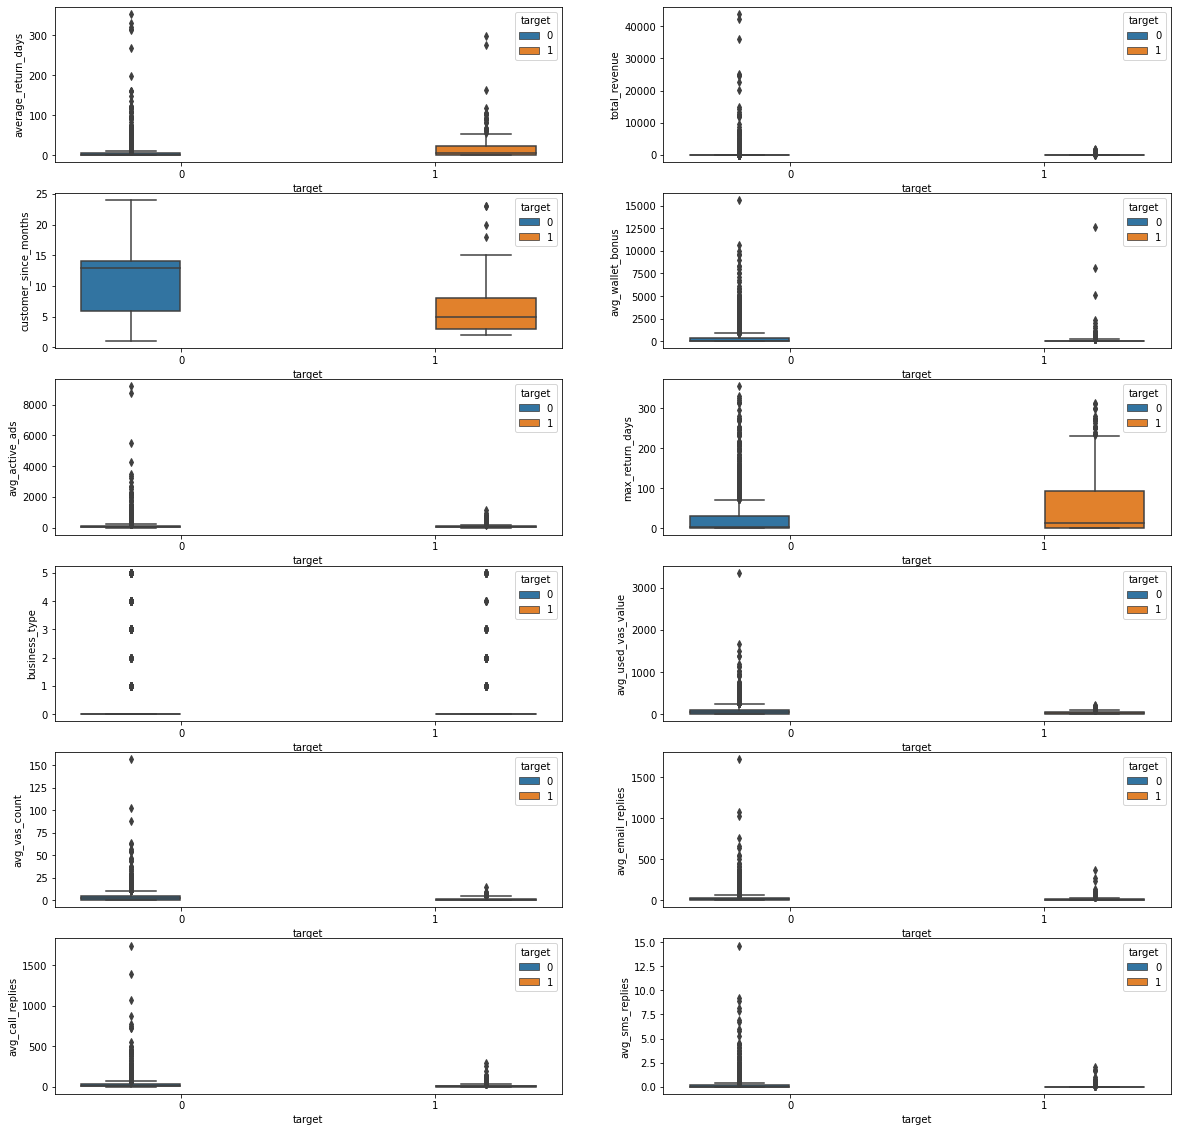

In [16]:
# Relations based on the continuous data attributes
fig, axarr = plt.subplots(6, 2, figsize=(20, 20))
sns.boxplot(y='average_return_days',x = 'target', hue = 'target',data = df, ax=axarr[0][0])
sns.boxplot(y='total_revenue',x = 'target', hue = 'target',data = df , ax=axarr[0][1])
sns.boxplot(y='customer_since_months',x = 'target', hue = 'target',data = df, ax=axarr[1][0])
sns.boxplot(y='avg_wallet_bonus',x = 'target', hue = 'target',data = df, ax=axarr[1][1])
sns.boxplot(y='avg_active_ads',x = 'target', hue = 'target',data = df, ax=axarr[2][0])
sns.boxplot(y='max_return_days',x = 'target', hue = 'target',data = df, ax=axarr[2][1])
sns.boxplot(y='business_type',x = 'target', hue = 'target',data = df, ax=axarr[3][0])
sns.boxplot(y='avg_used_vas_value',x = 'target', hue = 'target',data = df, ax=axarr[3][1])
sns.boxplot(y='avg_vas_count',x = 'target', hue = 'target',data = df, ax=axarr[4][0])
sns.boxplot(y='avg_email_replies',x = 'target', hue = 'target',data = df, ax=axarr[4][1])
sns.boxplot(y='avg_call_replies',x = 'target', hue = 'target',data = df, ax=axarr[5][0])
sns.boxplot(y='avg_sms_replies',x = 'target', hue = 'target',data = df, ax=axarr[5][1])


## Note the following:
* There is significant difference in the total revenue distribution between retained and churned customers only when the     revenue is higher then average.
* The clients who spent more time with the company are more likely to stay.
* The clients who have more active adds then the average number are likely to stay.
* Neither the business type or the average return days has a significant effect on the likelihood to churn.
* Also there is no difference in which way people do reply on messages but how many times they reply matters.
* The clients who have more vas counts are also most likely to stay with the company.

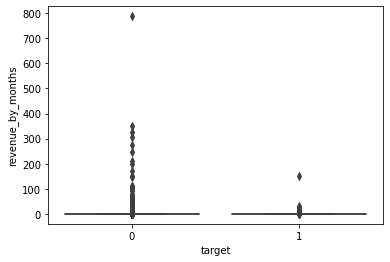

In [17]:
# create a column which shows an average revenue from a person by months and plot its influence on a target.
df['revenue_by_months'] = df['average_revenue']/df['customer_since_months']
sns.boxplot(x = df.target, y = df.revenue_by_months);

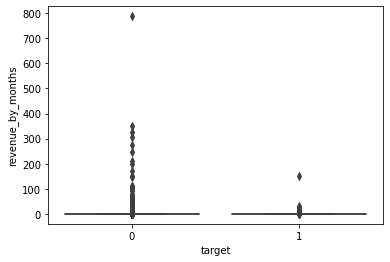

In [18]:
# create a new column of average no of replies from clients
df['avg_replies'] = (df['avg_email_replies'] + df['avg_call_replies'] + df['avg_sms_replies'])/3
sns.boxplot(x = df.target, y = df.revenue_by_months);

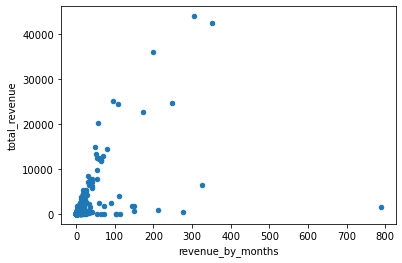

In [19]:
# the total revenue increases as the monthly revenue for a customer increases.
df[['revenue_by_months', 'total_revenue']].plot.scatter(x = 'revenue_by_months', y='total_revenue');

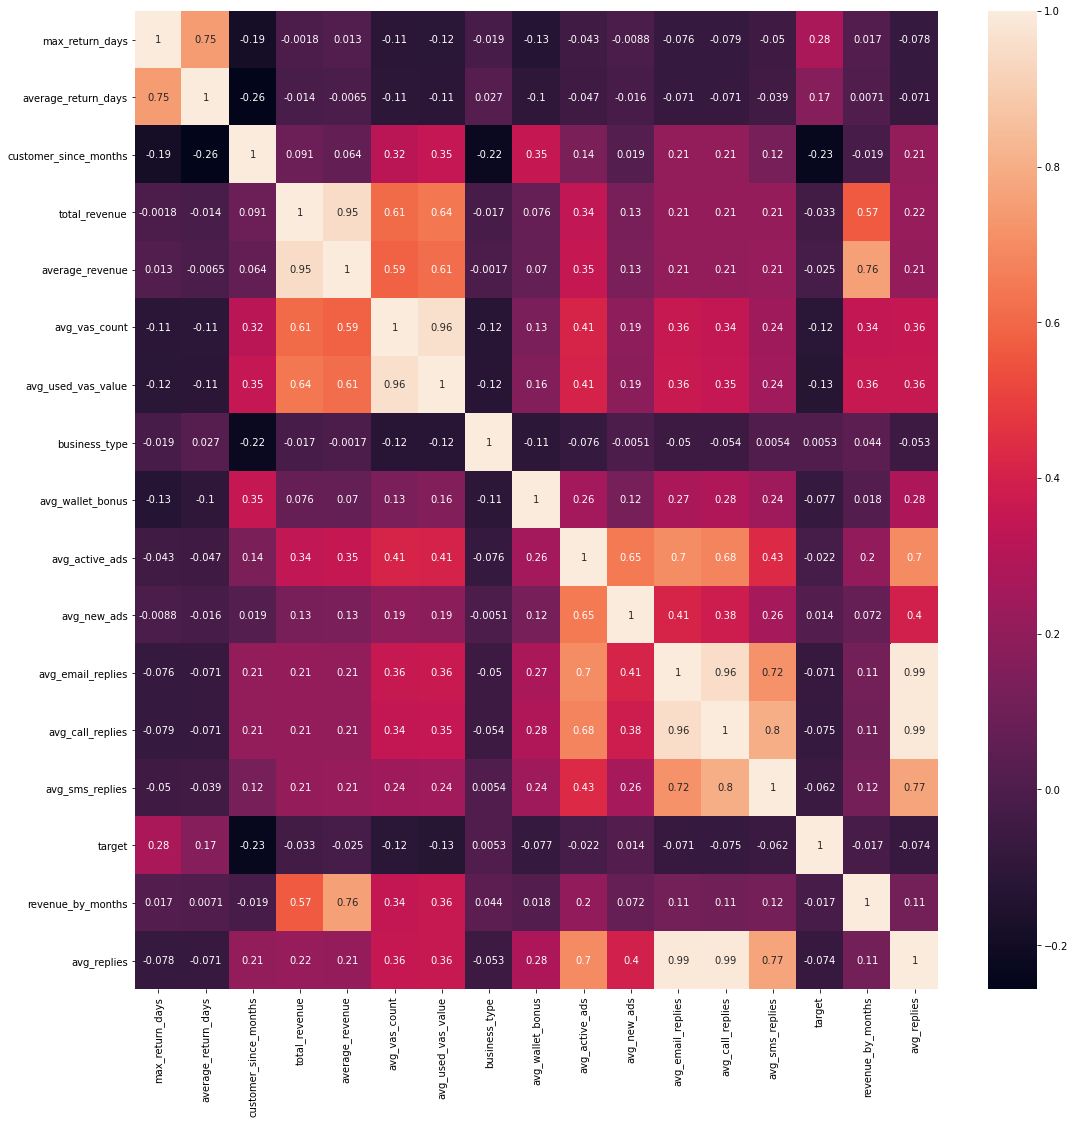

In [20]:
#build heatmap to check for correlation between features
corr = df.corr()
top_features = corr.index
plt.figure(figsize=(18,18))
sns.heatmap(df[top_features].corr(), annot=True)

In [21]:
#drop highly correlated features
df.drop(columns=['total_revenue', 'avg_vas_count', 'avg_call_replies', 'avg_email_replies', 'avg_sms_replies'], inplace=True)

### After going through the above EDA I will develop some predictive models and compare them.
I will develop Logistic Regression, Random Forest, SVM and XG Boost.

In [22]:
# Scaling all the variables to a range of 0 to 1

y = df['target'].values
X = df.drop(columns = ['target'])

from sklearn.preprocessing import MinMaxScaler
features = X.columns.values
scaler = MinMaxScaler(feature_range = (0,1))
scaler.fit(X)
X = pd.DataFrame(scaler.transform(X))
X.columns = features

In [23]:
# Create Train & Test Data
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2,random_state=0)

#### Running logistic regression model

In [25]:
from sklearn.linear_model import LogisticRegression
model = LogisticRegression()
result = model.fit(X_train, y_train)

In [26]:
from sklearn import metrics
prediction_test = model.predict(X_test)
# Print the prediction accuracy
print (metrics.accuracy_score(y_test, prediction_test))

0.909297052154195


In [62]:
from sklearn.metrics import classification_report
print(classification_report(df.target, model.predict(df.loc[:, df.columns != 'target'])))

              precision    recall  f1-score   support

           0       0.94      0.71      0.81      3952
           1       0.19      0.60      0.29       455

    accuracy                           0.70      4407
   macro avg       0.57      0.66      0.55      4407
weighted avg       0.86      0.70      0.76      4407



AxesSubplot(0.125,0.125;0.775x0.755)


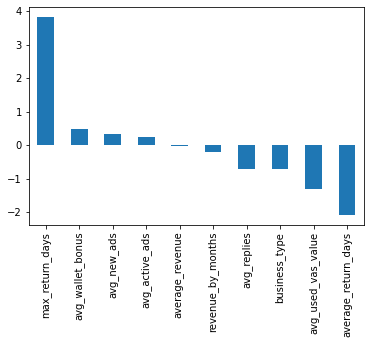

In [68]:
# To get the weights of all the variables
weights = pd.Series(model.coef_[0],
                 index=X.columns.values)
print (weights.sort_values(ascending = False)[:10].plot(kind='bar'))

##### As you can see that some variables have a negative relation to our predicted variable, while some have positive relation. Negative relation means that likeliness of churn decreases with that variable.

#### Running random forest

In [102]:
from sklearn.ensemble import RandomForestClassifier
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=101)
model_rf = RandomForestClassifier(n_estimators=1000 , oob_score = True, n_jobs = -1,
                                  random_state =50, max_features = "auto",
                                  max_leaf_nodes = 30)
model_rf.fit(X_train, y_train)

# Make predictions
prediction_test = model_rf.predict(X_test)
print (metrics.accuracy_score(y_test, prediction_test))

0.9115646258503401


In [61]:
print(classification_report(df.target, model_rf.predict(df.loc[:, df.columns != 'target'])))

              precision    recall  f1-score   support

           0       0.90      1.00      0.94      3952
           1       0.27      0.01      0.03       455

    accuracy                           0.89      4407
   macro avg       0.59      0.50      0.48      4407
weighted avg       0.83      0.89      0.85      4407



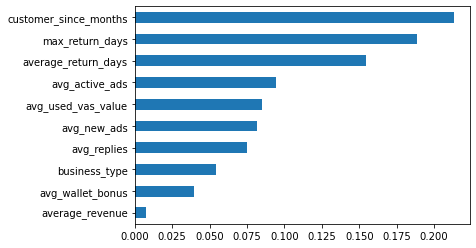

In [71]:
# feature importance
importances = model_rf.feature_importances_
weights = pd.Series(importances,
                 index=X.columns.values)
weights.sort_values()[-10:].plot(kind = 'barh')

* From random forest algorithm, customer_since_months, max_return_days and average_return_days are the most important predictor variables to predict target.

#### Running Support Vecor Machine (SVM)

In [63]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)

from sklearn.svm import SVC

model_svm = SVC(kernel='linear') 
model_svm.fit(X_train,y_train)
preds = model_svm.predict(X_test)
metrics.accuracy_score(y_test, preds)

0.8979591836734694

In [64]:
print(classification_report(df.target, model_svm.predict(df.loc[:, df.columns != 'target'])))

              precision    recall  f1-score   support

           0       0.90      0.99      0.94      3952
           1       0.10      0.01      0.01       455

    accuracy                           0.89      4407
   macro avg       0.50      0.50      0.48      4407
weighted avg       0.81      0.89      0.85      4407



#### XG Boost

In [44]:
from xgboost import XGBClassifier
model_XGB = XGBClassifier()
model_XGB.fit(X_train, y_train)
preds = model_XGB.predict(X_test)
metrics.accuracy_score(y_test, preds)

0.9104308390022676

In [60]:
print(classification_report(df.target, model_XGB.predict(df.loc[:, df.columns != 'target'])))

              precision    recall  f1-score   support

           0       0.92      0.79      0.85      3952
           1       0.18      0.41      0.25       455

    accuracy                           0.75      4407
   macro avg       0.55      0.60      0.55      4407
weighted avg       0.84      0.75      0.79      4407



##### Random forest model shows the best accuracy score (91%). I will save a model so it could be used again without retraining.

In [ ]:
import pickle
with open('forest.pickle','wb') as f:
    pickle.dump(model_rf,f)

##### Shap values show how much a given feature changed our prediction. I will be using an xgboost model, which SHAP has some optimizations for and which is much faster.

In [53]:
# package used to calculate Shap values
import shap
explainer = shap.TreeExplainer(model_XGB)
shap_values = explainer.shap_values(X_test)

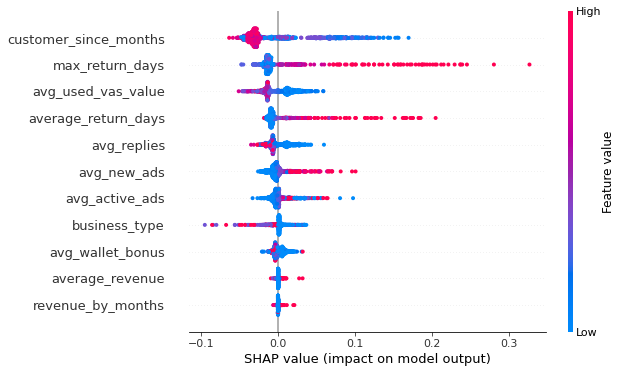

In [57]:
# This plot provides a great overview of the model
shap.summary_plot(shap_values[1], X_test)

### Notes from the summary plot:

* Revenue in general and average bonus amount in wallet almost doesn't effect the prediction of the model.
* It looks like it is harder to keep clients who started to pay earlier then others.
* The clients who made a re-purchase during some period does have some real trust in a company. It seems like the are happy with the company in long period of time.
* The clients who use less number of vas and has more active ads are most likely to stay.
* Strange, but the graph shows us that the clients who replies less on messages are most likely to stay. Mayby its because they are already sutisfied with the company and they rather not waste their time on messages.

## Conclusion

After running different classification machine learning models, error analysis metrics, I can make a conclusion that model with the highest accuracy and F score is a winner and it is Random forest model. However, in as much as the model has a high accuracy, it still misses some of the clients who are going to leave. This could be improved by providing retraining the model with more data over time, more investigation in data and more questions to the people with the domain knowledge, reformatting some features or create new ones. Then again, we need to train and test models to check the impact of these changes.